# Overview
data contains 1249 sick persons each person from them did a medical tests. the test result is out of three tests came from testing on axial , coronal and sagittal
each test of them in a type of video and each contains a frames betweein 30 to 44 frame
when a person finish his results the nurses gave him three exams abnormal , acl and meniscus
so all we need to know which one of medicals tests made this person abnormal . and which of them made him acl ,same for meniscus
also is one of medical tests ,axial for example is the reason for abnormal or combination of axial , coronoal and sagittal?
so our purpose in this project  is to answer that question
dataset contains of rows equal to length of videos * length of frame in each video
and each has the it's corresponding label
we 'll use our model for about 12 times.

1.   training dataset is axial and labels is abnormal
2.   training dataset is axial and labels is acl
3.   training dataset is axial and labels is meniscus
2.   training dataset is coronal and labels is abnormal
5.   training dataset is coronal and labels is acl
6.   training dataset is coronal and labels is meniscus
7.   training dataset is sagittal and labels is abnormal
8.   training dataset is sagittal and labels is acl
9.   training dataset is sagittal and labels is meniscus
10. training dataset is axial+coronal+sagittal and labels is abnormal
11. training dataset is axial+coronal+sagittal and labels is acl
12. training dataset is axial+coronal+sagittal and labels is meniscus

then to solve our main question is to get the highest abnormal,acl and meniscus accuracy
then use them to predict new ones

Downloading Data

In [0]:
# ! wget http://download.cs.stanford.edu/deep/MRNet-v1.0.zip

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import gc 
import os
import pickle
import cv2
from google.colab import drive
from google.colab import files
from numpy import genfromtxt
np.set_printoptions(suppress=True)

In [41]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
"""
from shutil import copyfile
copyfile("gdrive/My Drive/MBRNet/MRNet.zip",'MRNet-v1.0.zip')
"""

'\nfrom shutil import copyfile\ncopyfile("gdrive/My Drive/MBRNet/MRNet.zip",\'MRNet-v1.0.zip\')\n'

In [0]:
!unzip 'gdrive/My Drive/MBRNet/MRNet.zip'

#Preprocessing

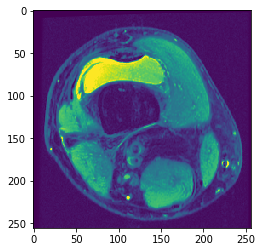

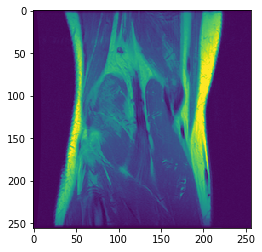

In [44]:
plt.figure()
plt.imshow(np.load('MRNet-v1.0/train/axial/0001.npy')[0])
plt.figure()
plt.imshow(np.load('MRNet-v1.0/train/coronal/0001.npy')[0])

# dataset
i split my data in train folder into training and testing data because of facing a problem in fitting memory
training data : 75%
testing data 25%

In [0]:
labels_abnormal = genfromtxt("MRNet-v1.0/train-abnormal.csv", delimiter=',')[:,1]
labels_acl = genfromtxt("MRNet-v1.0/train-acl.csv", delimiter=',')[:,1]
labels_meniscus = genfromtxt("MRNet-v1.0/train-meniscus.csv", delimiter=',')[:,1]

In [0]:
X_train_axial = []
X_test_axial = []
y_train_axial_abnormal = []
y_test_axial_abnormal = []
y_train_axial_acl = []
y_test_axial_acl = []
y_train_axial_meniscus = []
y_test_axial_meniscus = []

base_file_axial = "MRNet-v1.0/train/axial/" 
for file in range(50):
  file_name =  base_file_axial + str(file).rjust(4,'0') + ".npy"
  video = np.load(file_name)
  length = len(video)
  num_of_train = int(length*0.75) #75% train 25% test
  for frame in range(length):
    if(frame < num_of_train):
      X_train_axial.append(video[frame])
      y_train_axial_abnormal.append(labels_abnormal[file])
      y_train_axial_acl.append(labels_abnormal[file])
      y_train_axial_meniscus.append(labels_abnormal[file])
    else:
      X_test_axial.append(video[frame])
      y_test_axial_abnormal.append(labels_abnormal[file])
      y_test_axial_acl.append(labels_abnormal[file])
      y_test_axial_meniscus.append(labels_abnormal[file]) 
      


# Important
if you have enough memory (min 16GB) you can train on training data folder and test on valid data folder 
you can run four next cells instead of last cell (it'll give you high and real accuracy )
last cell i broke my train into train and test it's somehow has overfitting and model has learning only this data **

In [47]:
"""
train_labels_abnormal = genfromtxt("MRNet-v1.0/train-abnormal.csv", delimiter=',')[:,1]
train_labels_acl = genfromtxt("MRNet-v1.0/train-acl.csv", delimiter=',')[:,1]
train_labels_meniscus = genfromtxt("MRNet-v1.0/train-meniscus.csv", delimiter=',')[:,1]
test_labels_abnormal = genfromtxt("MRNet-v1.0/valid-abnormal.csv", delimiter=',')[:,1]
test_labels_acl = genfromtxt("MRNet-v1.0/valid-acl.csv", delimiter=',')[:,1]
test_labels_meniscus = genfromtxt("MRNet-v1.0/valid-meniscus.csv", delimiter=',')[:,1]
"""

'\ntrain_labels_abnormal = genfromtxt("MRNet-v1.0/train-abnormal.csv", delimiter=\',\')[:,1]\ntrain_labels_acl = genfromtxt("MRNet-v1.0/train-acl.csv", delimiter=\',\')[:,1]\ntrain_labels_meniscus = genfromtxt("MRNet-v1.0/train-meniscus.csv", delimiter=\',\')[:,1]\ntest_labels_abnormal = genfromtxt("MRNet-v1.0/valid-abnormal.csv", delimiter=\',\')[:,1]\ntest_labels_acl = genfromtxt("MRNet-v1.0/valid-acl.csv", delimiter=\',\')[:,1]\ntest_labels_meniscus = genfromtxt("MRNet-v1.0/valid-meniscus.csv", delimiter=\',\')[:,1]\n'

In [48]:
"""
X_train_axial = []
y_train_axial_abnormal = []
y_train_axial_acl = []
y_train_axial_meniscus = []

base_file_train_axial = "MRNet-v1.0/train/axial/" 
train_path, train_dirs, train_files = next(os.walk(base_file_train_axial))
train_length = len(train_files) - 1
fake_length = 100
for train_file in range(train_length):
  video = np.load(base_file_train_axial + str(train_file).rjust(4,'0') + ".npy")
  length = int(len(video)) 
  for frame in range(length):
    X_train_axial.append(video[frame])
    y_train_axial_abnormal.append(train_labels_abnormal[frame])
    y_train_axial_acl.append(train_labels_abnormal[frame])
    y_train_axial_meniscus.append(train_labels_abnormal[frame])
  del video
  del length
  gc.collect()
"""

'\nX_train_axial = []\ny_train_axial_abnormal = []\ny_train_axial_acl = []\ny_train_axial_meniscus = []\n\nbase_file_train_axial = "MRNet-v1.0/train/axial/" \ntrain_path, train_dirs, train_files = next(os.walk(base_file_train_axial))\ntrain_length = len(train_files) - 1\nfake_length = 100\nfor train_file in range(train_length):\n  video = np.load(base_file_train_axial + str(train_file).rjust(4,\'0\') + ".npy")\n  length = int(len(video)) \n  for frame in range(length):\n    X_train_axial.append(video[frame])\n    y_train_axial_abnormal.append(train_labels_abnormal[frame])\n    y_train_axial_acl.append(train_labels_abnormal[frame])\n    y_train_axial_meniscus.append(train_labels_abnormal[frame])\n  del video\n  del length\n  gc.collect()\n'

In [49]:
"""
X_test_axial = []
y_test_axial_abnormal = []
y_test_axial_acl = []
y_test_axial_meniscus = []

base_file_test_axial = "MRNet-v1.0/valid/axial/" 
test_path, test_dirs, test_files = next(os.walk(base_file_test_axial))
test_length = len(test_files)
fake_length = 50 
for test_file in range(1130,test_length+1130):
  video = np.load(base_file_test_axial+ str(test_file).rjust(4,'0') + ".npy")
  length = int(len(video)/2) 
  for frame in range(length):
    X_test_axial.append(video[frame])
    y_test_axial_abnormal.append(test_labels_abnormal[frame])
    y_test_axial_acl.append(test_labels_abnormal[frame])
    y_test_axial_meniscus.append(test_labels_abnormal[frame])
  del video
  del length
  gc.collect()
"""

'\nX_test_axial = []\ny_test_axial_abnormal = []\ny_test_axial_acl = []\ny_test_axial_meniscus = []\n\nbase_file_test_axial = "MRNet-v1.0/valid/axial/" \ntest_path, test_dirs, test_files = next(os.walk(base_file_test_axial))\ntest_length = len(test_files)\nfake_length = 50 \nfor test_file in range(1130,test_length+1130):\n  video = np.load(base_file_test_axial+ str(test_file).rjust(4,\'0\') + ".npy")\n  length = int(len(video)/2) \n  for frame in range(length):\n    X_test_axial.append(video[frame])\n    y_test_axial_abnormal.append(test_labels_abnormal[frame])\n    y_test_axial_acl.append(test_labels_abnormal[frame])\n    y_test_axial_meniscus.append(test_labels_abnormal[frame])\n  del video\n  del length\n  gc.collect()\n'

In [50]:
"""
del train_labels_abnormal
del train_labels_acl
del train_labels_meniscus
del test_labels_abnormal
del test_labels_acl
del test_labels_meniscus
del train_path, train_dirs, train_files
del test_path, test_dirs, test_files
gc.collect()
"""

'\ndel train_labels_abnormal\ndel train_labels_acl\ndel train_labels_meniscus\ndel test_labels_abnormal\ndel test_labels_acl\ndel test_labels_meniscus\ndel train_path, train_dirs, train_files\ndel test_path, test_dirs, test_files\ngc.collect()\n'

In [51]:
for i in range(len(X_train_axial)):
  X_train_axial[i] = cv2.merge((X_train_axial[i],X_train_axial[i],X_train_axial[i]))
print("Done train")

Done train


In [52]:
for i in range(len(X_test_axial)):
  X_test_axial[i] = np.array(cv2.merge((X_test_axial[i],X_test_axial[i],X_test_axial[i])))
print("Done test")

Done test


In [53]:
print("length of X trains ",len(X_train_axial))
print("length of X test ",len(X_test_axial))

print("length of y trains abnormal ",len(y_train_axial_abnormal))
print("length of y test abnormal ",len(y_test_axial_abnormal))

print("length of y trains acl ",len(y_train_axial_acl))
print("length of y test acl ",len(y_test_axial_acl))

print("length of y trains meniscus ",len(y_train_axial_meniscus))
print("length of y test meniscus ",len(y_test_axial_meniscus))


length of X trains  1329
length of X test  464
length of y trains abnormal  1329
length of y test abnormal  464
length of y trains acl  1329
length of y test acl  464
length of y trains meniscus  1329
length of y test meniscus  464


(256, 256, 3)


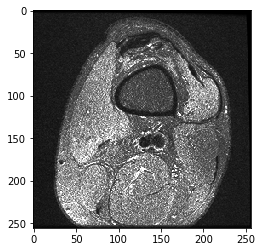

In [54]:
print(X_train_axial[1200].shape)
plt.imshow(X_train_axial[1200])

In [55]:
print(len(np.where(labels_abnormal == 1)[0])*100/len(labels_abnormal))
print(len(np.where(labels_acl == 1)[0])*100/len(labels_acl))
print(len(np.where(labels_meniscus == 1)[0])*100/len(labels_meniscus))

80.79646017699115
18.4070796460177
35.13274336283186


![resnet_architecture](gdrive/My Drive/MBRNet/resnet_arch.png)

In [0]:
from keras.applications import resnet50
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [0]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
        
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X_shortcut , X])
    X = Activation('relu')(X)

    return X

In [0]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(F2, (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    # Third component of main path (≈2 lines)
    X = Conv2D(F3, (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X_shortcut , X])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [0]:
def ResNet101(input_shape = (256, 256, 3), classes = 2):
    """
    Implementation of the popular ResNet101 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈23 lines)
    X = convolutional_block(X, f = 3, filters = [256,256,1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256,256,1024], stage=4, block='b')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='c')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='d')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='e')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='f')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='g')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='h')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='i')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='j')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='k')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='l')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='m')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='n')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='o')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='p')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='q')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='r')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='s')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='t')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='u')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='v')
    X = identity_block(X, 3, [256,256,1024], stage=4, block='w')



    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512,512,2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512,512,2048], stage=5, block='b')
    X = identity_block(X, 3, [512,512,2048], stage=5, block='c')
    X = identity_block(X, 3, [512,512,2048], stage=5, block='d')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2, 2), name="avg_pool")(X)
    

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet101')

    return model

In [0]:

model =resnet50.ResNet50(weights='imagenet')

model = ResNet101(input_shape = (256, 256, 3), classes = 2)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.utils import to_categorical

In [0]:
#X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
classes = 2

# Normalize image vectors
X_train_axial = np.array(X_train_axial)/255.
X_test_axial = np.array(X_test_axial)/255.


# Convert training and test labels to one hot matrices
y_train_axial_abnormal = to_categorical(y_train_axial_abnormal)
y_test_axial_abnormal = to_categorical(y_test_axial_abnormal)



In [74]:
history = model.fit(X_train_axial, y_train_axial_abnormal,validation_split=0.33, epochs = 2, batch_size = 20)

Train on 890 samples, validate on 439 samples
Epoch 1/2
890/890 [==============================] - 61s 69ms/step - loss: 4.2556 - acc: 0.7292 - val_loss: 2.3498 - val_acc: 0.8542
Epoch 2/2
890/890 [==============================] - 25s 28ms/step - loss: 3.6402 - acc: 0.7742 - val_loss: 2.3498 - val_acc: 0.8542


In [75]:
preds = model.evaluate(X_test_axial, y_test_axial_abnormal)
print ("Loss = " + str(preds[0]))
print  ("Test Accuracy = " + str(preds[1]))

464/464 [==============================] - 4s 8ms/step
Loss = 3.1958293174875254
Test Accuracy = 0.8017241379310345


In [66]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

# History
as you see history is constant that's because of the fact that number of epochs only 2 also number of training example very low

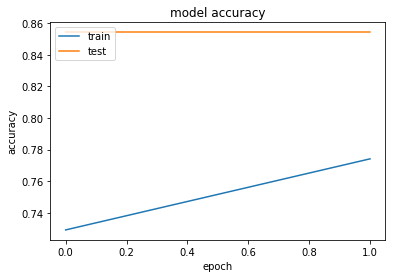

In [76]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

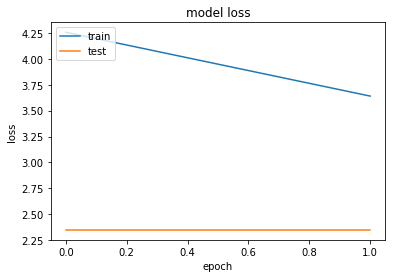

In [77]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#model = load_model('ResNet101.h5') 
model.save_weights("gdrive/My Drive/MBRNet/train_axial_abnormal.h5")

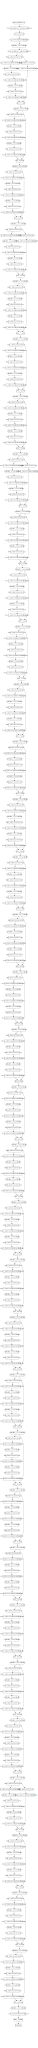

In [70]:
plot_model(model, to_file='gdrive/My Drive/MBRNet/train_axial_abnormal_model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Resources
*   https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1002699#pmed.1002699.ref029
*   https://www.coursera.org/learn/convolutional-neural-networks